## Polyptich: easier layouting in matplotlib

In [1]:
import polyptich as pp

In [2]:
pp.setup_ipython()

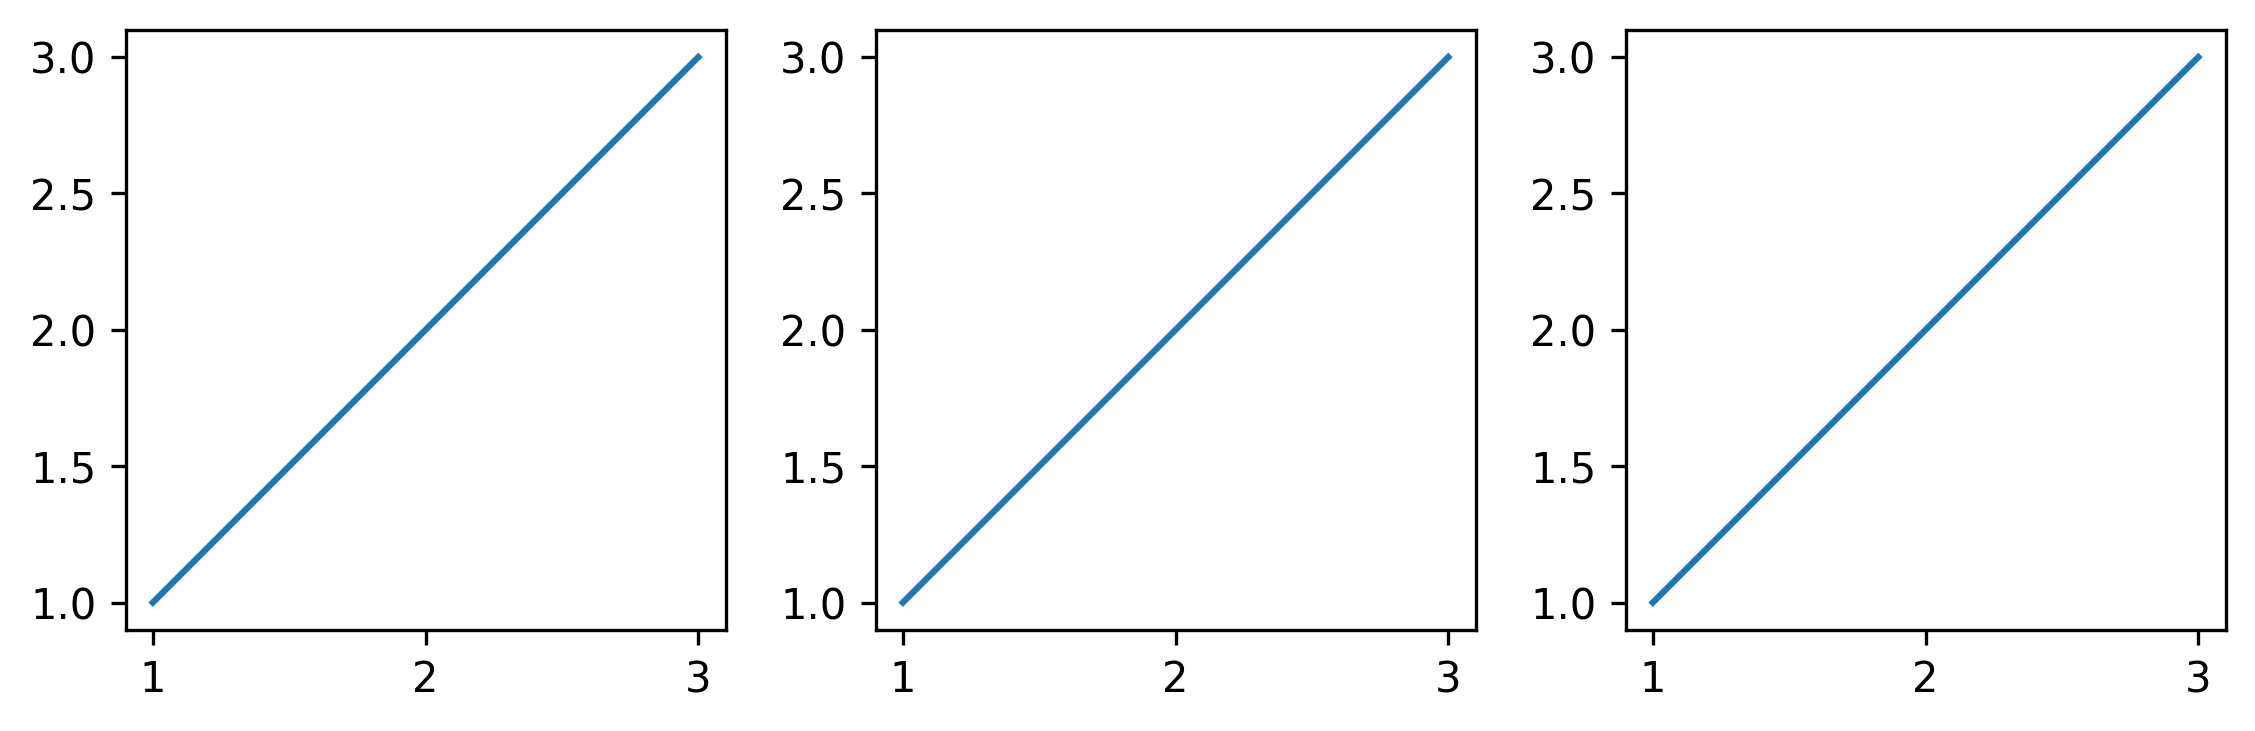

In [3]:
fig = pp.Figure()
ax = pp.Panel((2, 2))
ax.plot([1, 2, 3], [1, 2, 3])
fig.main.add_right(ax)

ax = pp.Panel((2, 2))
ax.plot([1, 2, 3], [1, 2, 3])
fig.main.add_right(ax)

ax = pp.Panel((2, 2))
ax.plot([1, 2, 3], [1, 2, 3])
fig.main.add_right(ax)
fig.display()

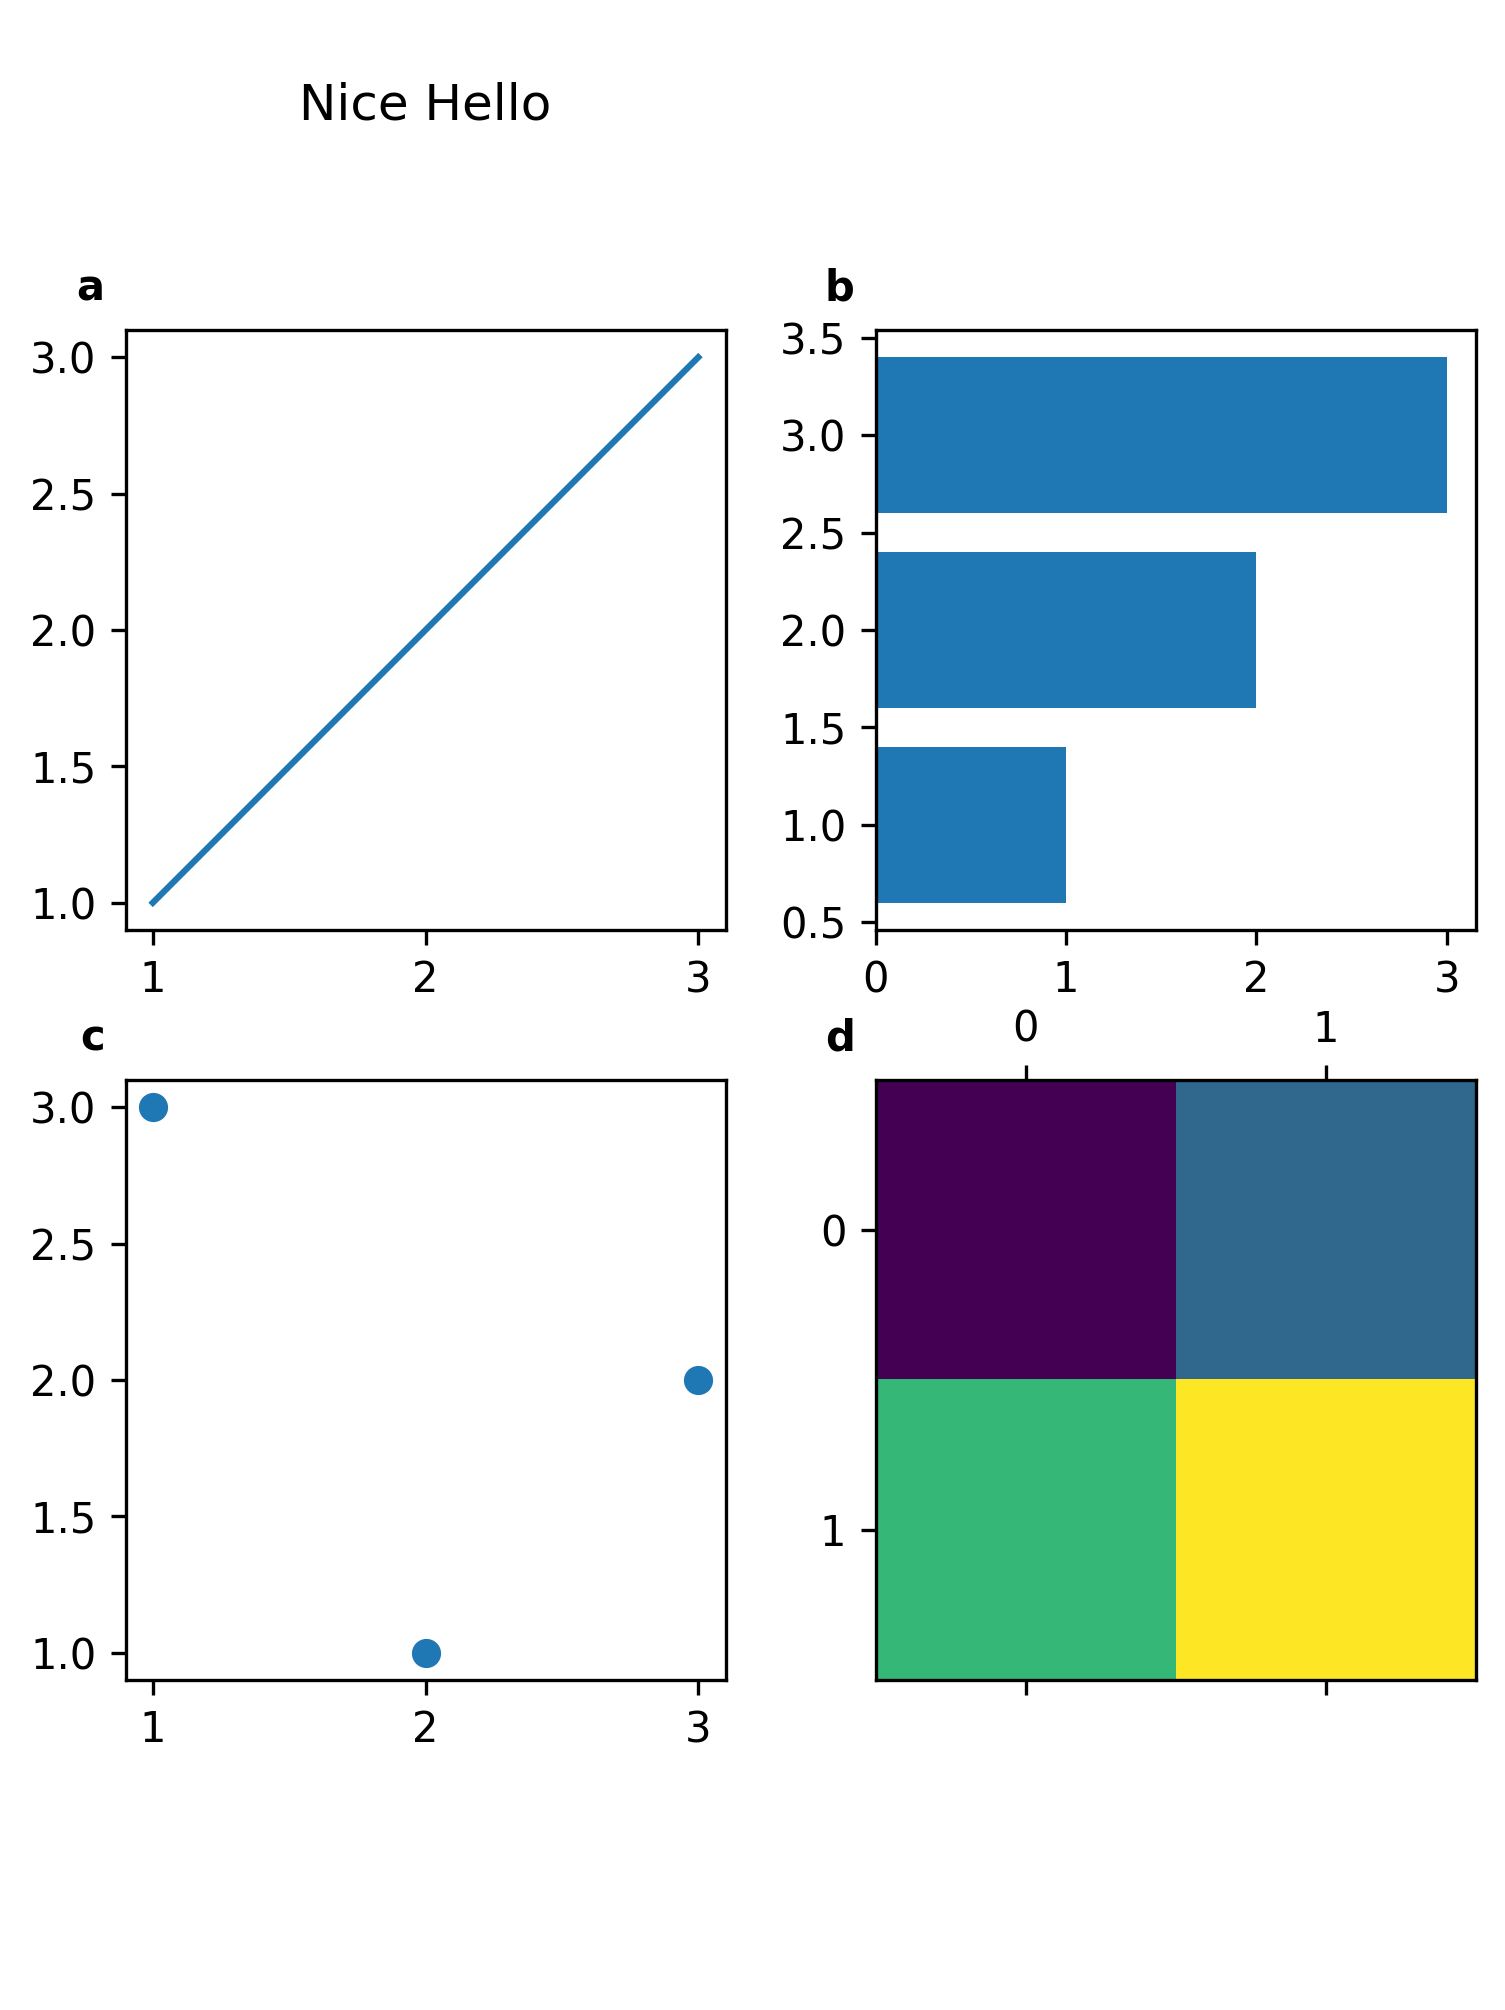

In [4]:
fig = pp.Figure()
ax1 = pp.Panel((2, 2))
ax1.plot([1, 2, 3], [1, 2, 3])
ax1.add_tag("a")

ax2 = pp.Panel((2, 2))
ax2.barh([1, 2, 3], [1, 2, 3])
ax2.add_tag("b")

ax3 = pp.Panel((2, 2))
ax3.scatter([1, 2, 3], [3, 1, 2])
ax3.add_tag("c")

ax4 = pp.Panel((2, 2))
ax4.matshow([[1, 2], [3, 4]])
ax4.add_tag("d")

title = pp.Title("Nice Hello")
legend = pp.Panel((None, 0.5))
legend.axis("off")

fig.main = title / (ax1 | ax2) / (ax3 | ax4) / legend
fig.display()

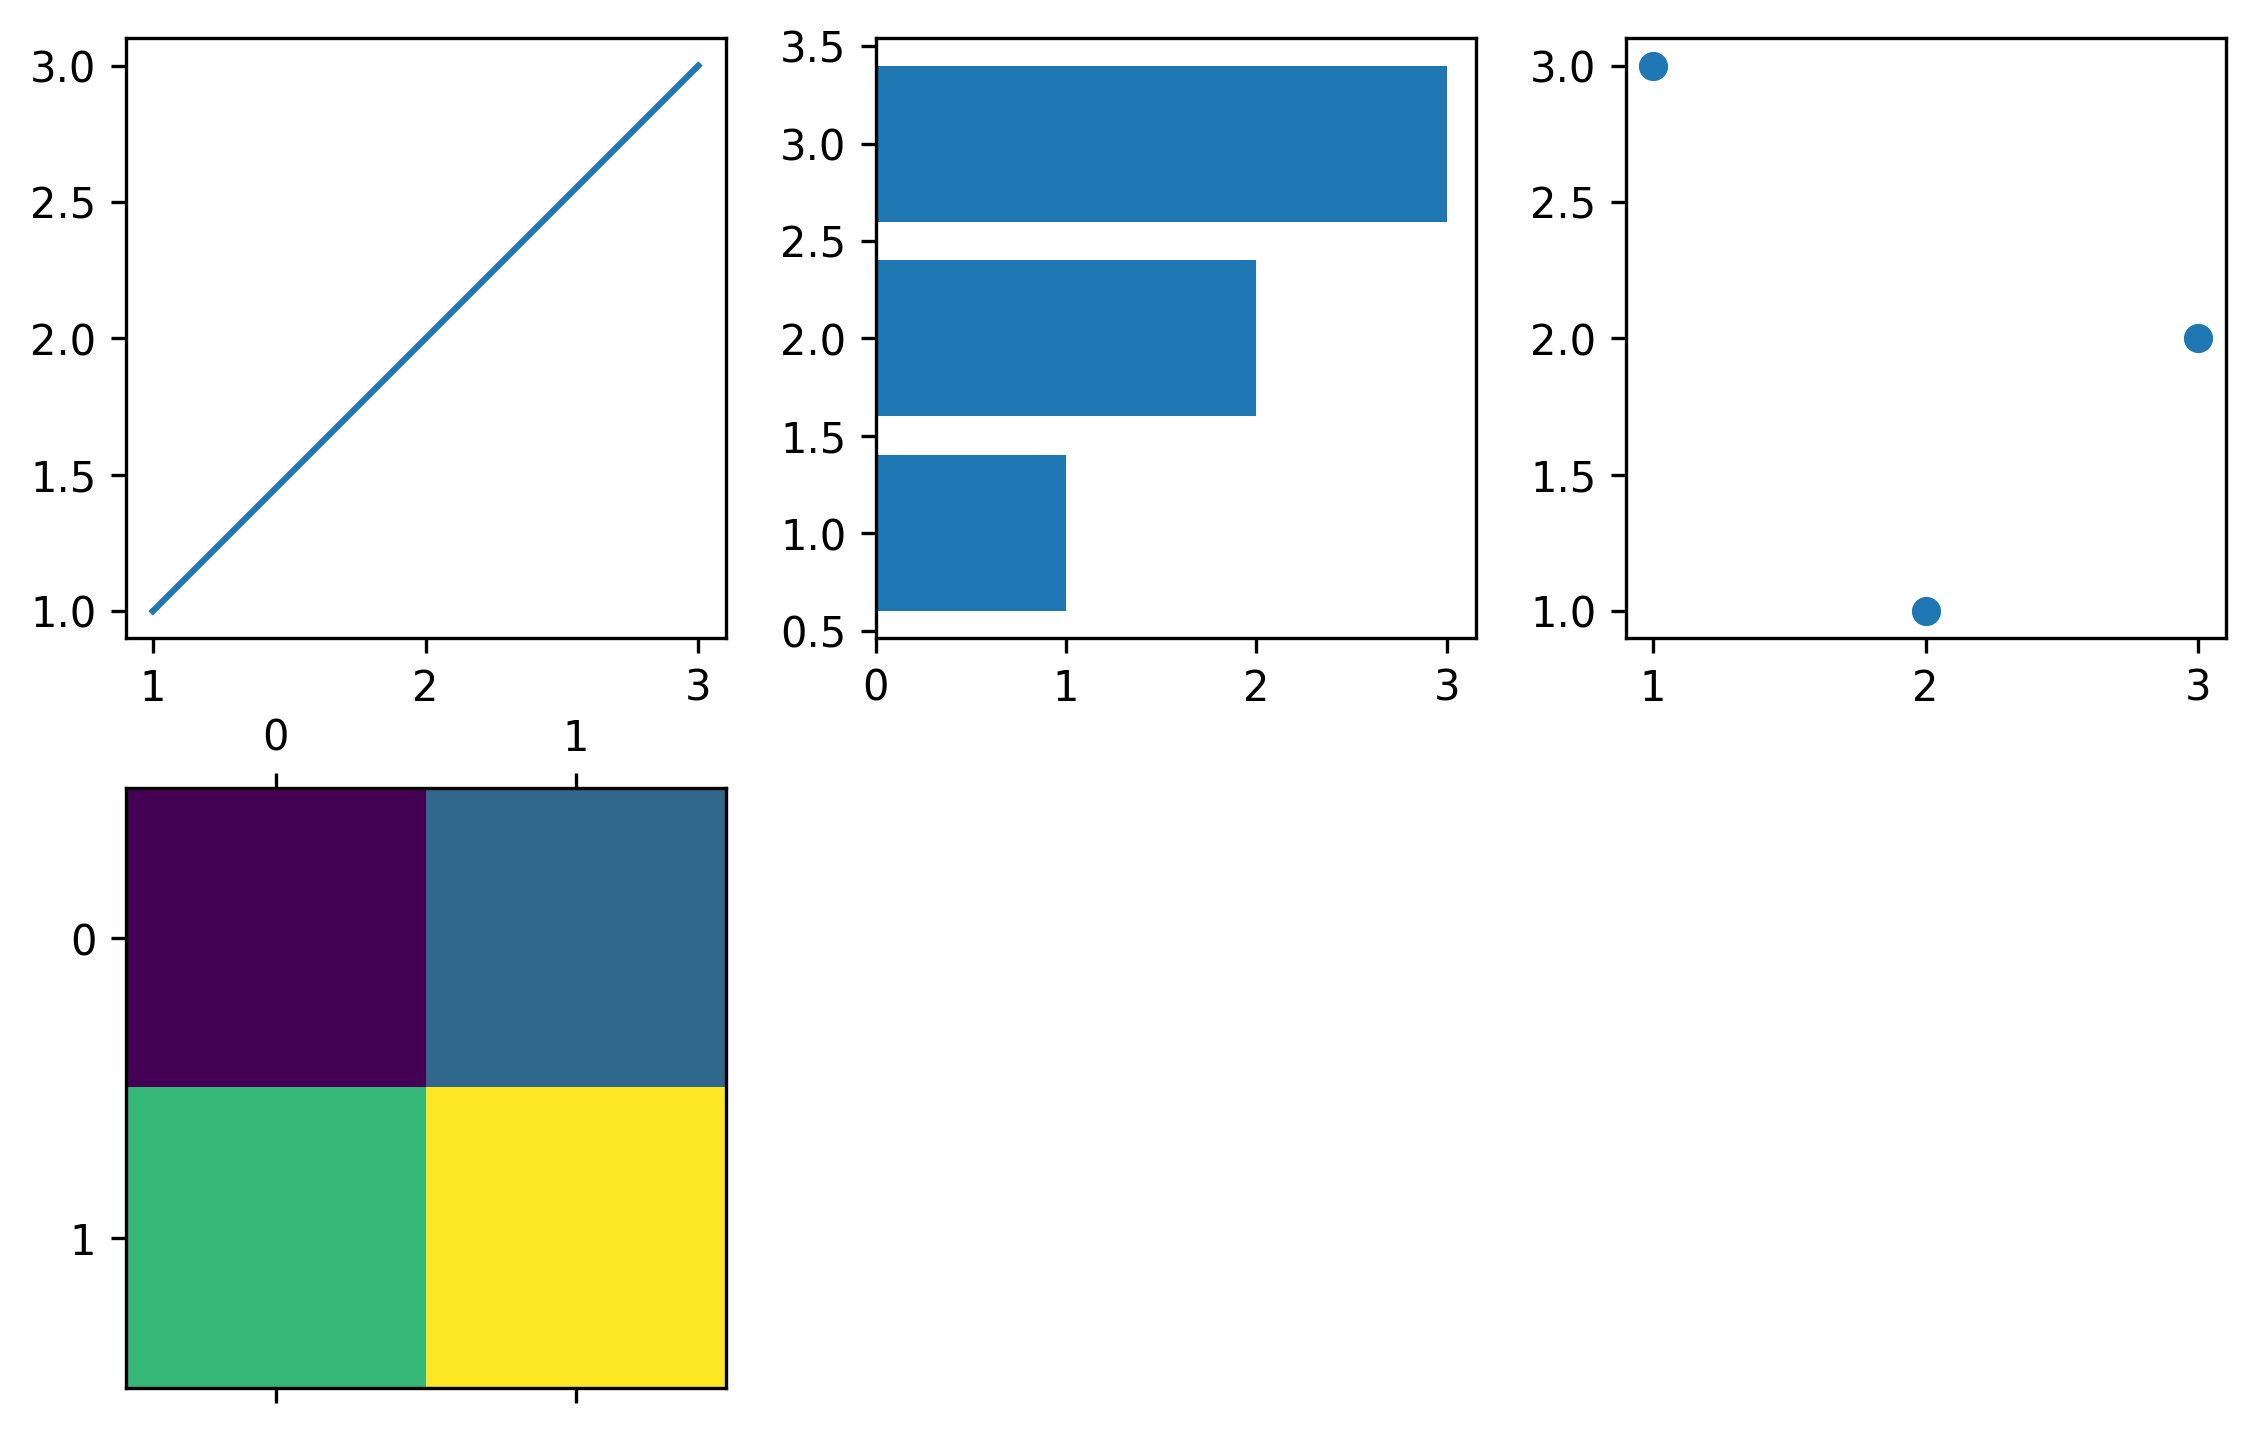

In [5]:
fig = pp.Figure()
axes = []

ax1 = pp.Panel((2, 2))
ax1.plot([1, 2, 3], [1, 2, 3])
axes.append(ax1)

ax2 = pp.Panel((2, 2))
ax2.barh([1, 2, 3], [1, 2, 3])
axes.append(ax2)

ax3 = pp.Panel((2, 2))
ax3.scatter([1, 2, 3], [3, 1, 2])
axes.append(ax3)

ax4 = pp.Panel((2, 2))
ax4.matshow([[1, 2], [3, 4]])
axes.append(ax4)

fig.main = pp.Wrap(axes, ncol = 3)
fig.display()

In [6]:
import pandas as pd
import numpy as np
data = pd.DataFrame(np.random.randn(1000, 20))
obs = pd.DataFrame({
    "celltype":["Kupffer cells"] * 300 + ["Stellate cells"] * 300 + ["Stupid cells"] * 400
})
celltypes = pd.DataFrame.from_dict({
    "Kupffer cells": {"color": "red"},
    "Stellate cells": {"color": "blue"},
    "Stupid cells": {"color": "green"}
}, orient = "index")
var = pd.DataFrame(index = [f"gene_{i}" for i in range(20)])
var["module"] = ["module_1"] * 5 + ["module_2"] * 5 + ["module_3"] * 10
data.columns = var.index
modules = pd.DataFrame({
    "module":["module_1", "module_2", "module_3"],
    "color":["red", "blue", "green"]
}).set_index("module")
var["color"] = modules.loc[var["module"]]["color"].values

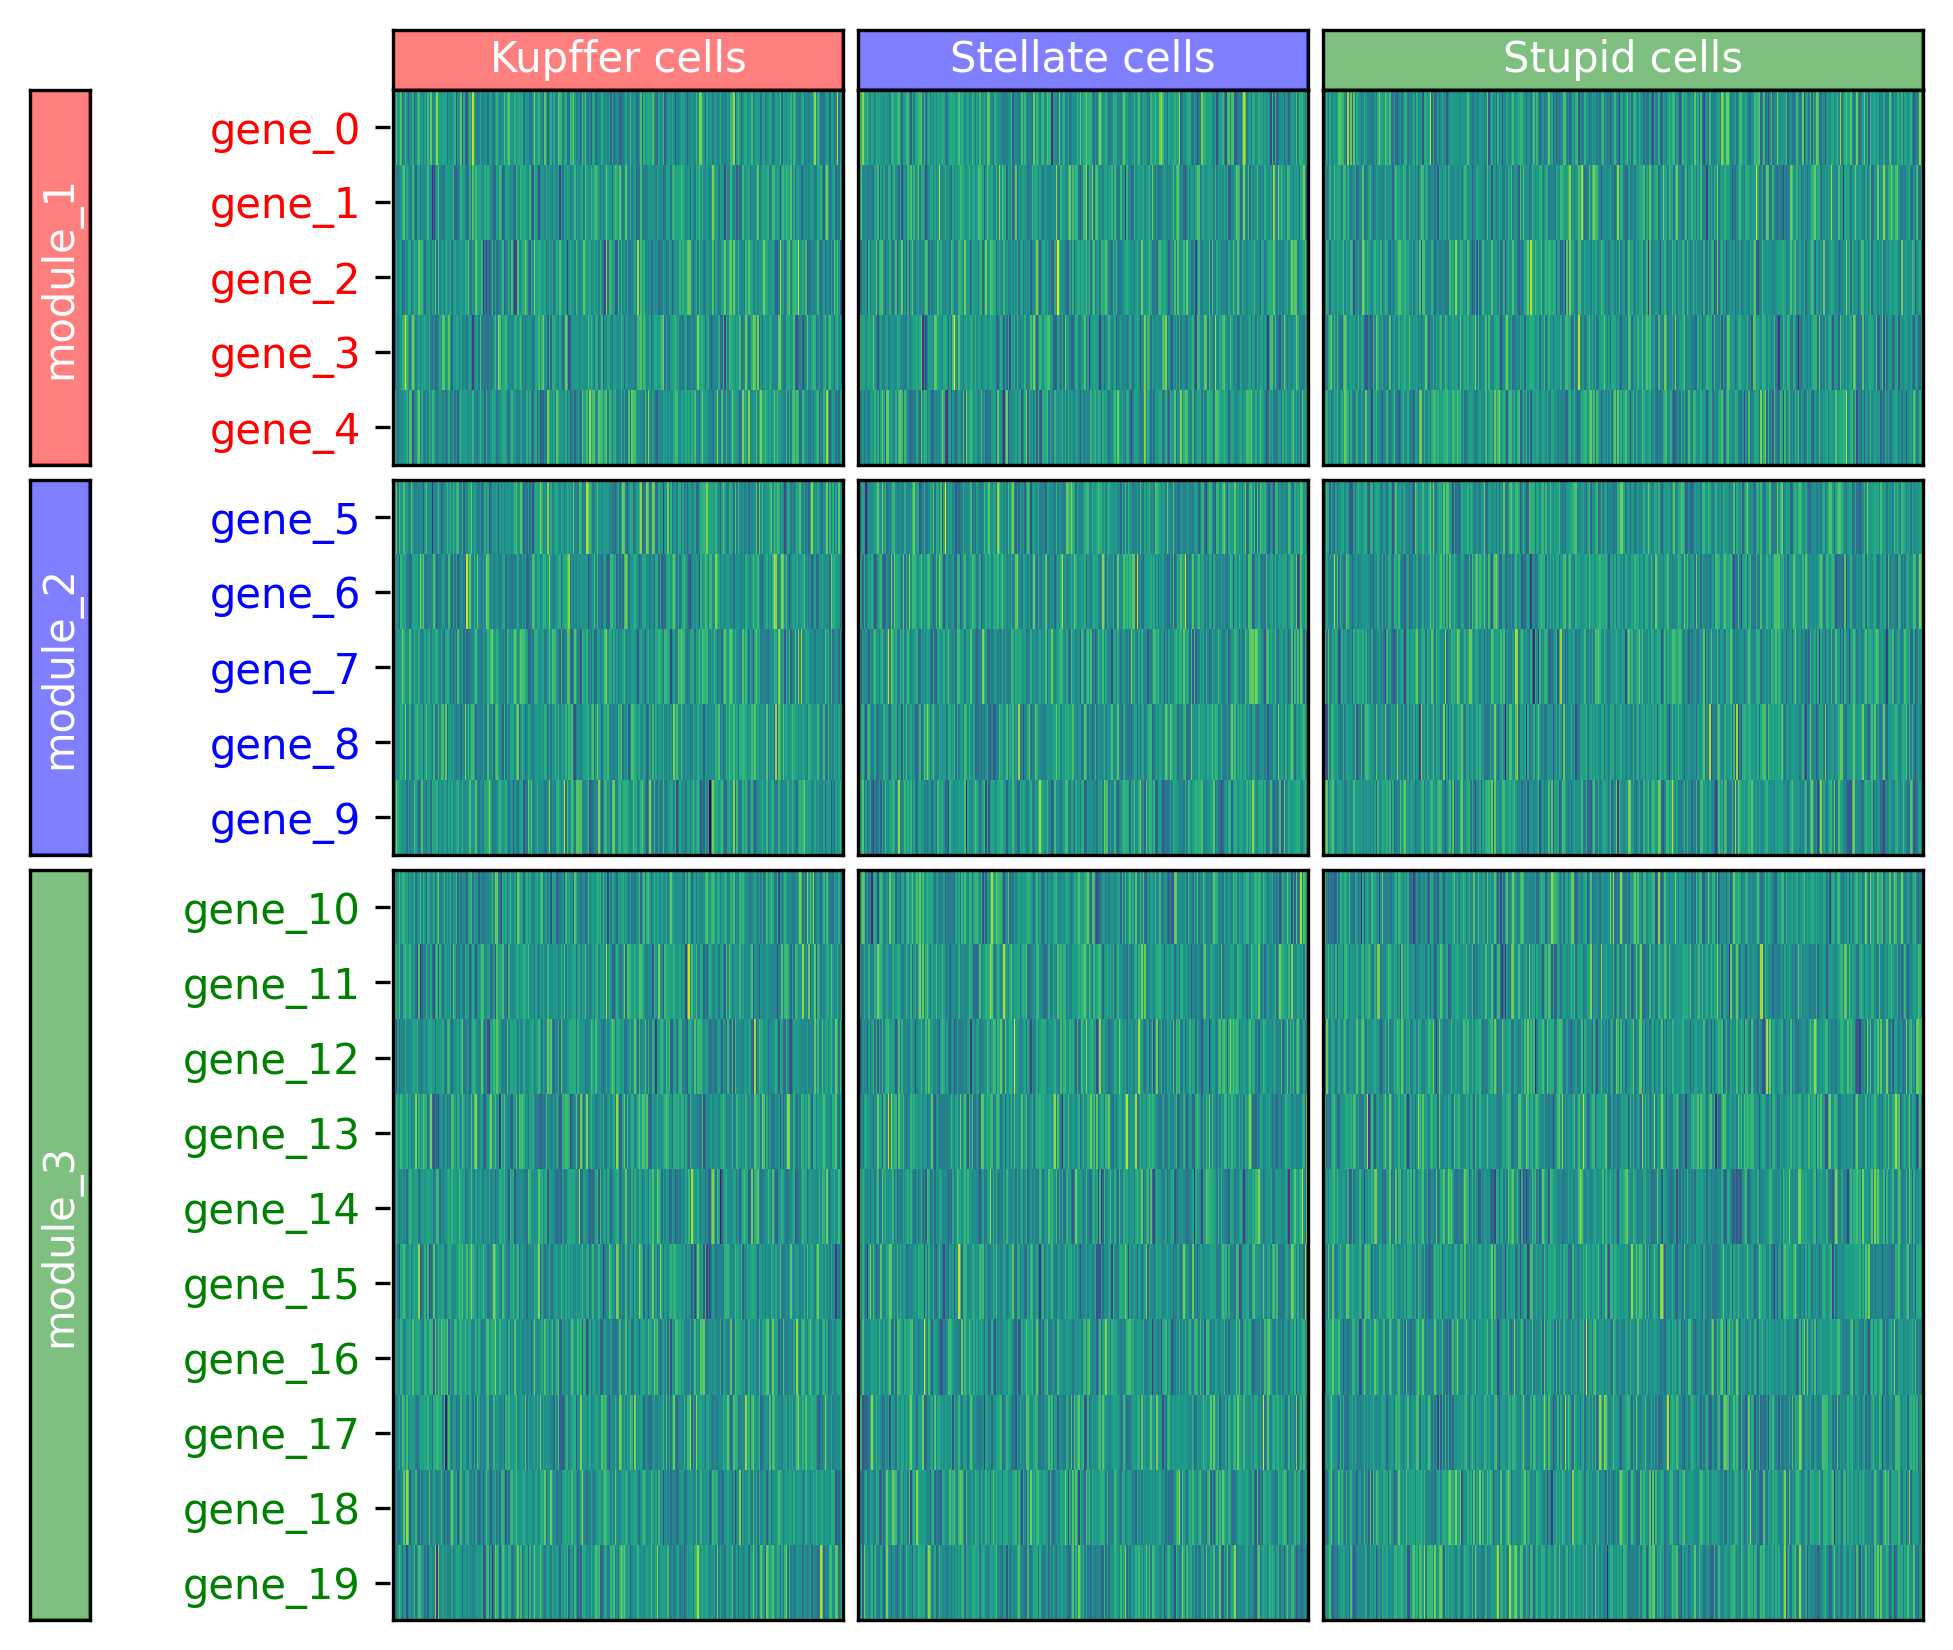

In [7]:
fig = pp.Figure(pp.Grid(padding_height = 0., padding_width = 0.))
row_layout = pp.heatmap.layouts.Simple()
row_layout = pp.heatmap.layouts.Broken(var["module"].astype("category"))
col_layout = pp.heatmap.layouts.Broken(obs["celltype"].astype("category"))

main_heatmap = fig.main.add(pp.heatmap.Heatmap(data, row_layout = row_layout, col_layout = col_layout))
heading = fig.main.add_above(pp.heatmap.heading.HeadingTop(obs, col_layout, celltypes))
# ticks = fig.main.add_under(pp.heatmap.ticks.TicksBottom(obs, col_layout), column = main_heatmap)

ticks = fig.main.add_left(pp.heatmap.ticks.TicksLeft(var, row_layout), row = main_heatmap)
heading = fig.main.add_left(pp.heatmap.heading.HeadingLeft(var, row_layout, modules), row = main_heatmap)

fig.display()